In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import techniques

In [2]:
wine_df = pd.read_csv("WineQT.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_sels = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
wine_df.loc[:, column_sels] = pd.DataFrame(data = scaler.fit_transform(wine_df.loc[:, column_sels]), columns = column_sels)

In [4]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.521580,0.700,0.00,-0.466421,0.076,-0.450467,-0.363610,0.99780,3.51,0.56,-0.963382,5,0
1,-0.292593,0.880,0.00,0.050060,0.098,0.915920,0.643477,0.99680,3.20,0.68,-0.593601,5,1
2,-0.292593,0.760,0.04,-0.171289,0.092,-0.060071,0.246745,0.99700,3.26,0.65,-0.593601,5,2
3,1.653789,0.280,0.56,-0.466421,0.075,0.135127,0.429852,0.99800,3.16,0.58,-0.593601,6,3
4,-0.521580,0.700,0.00,-0.466421,0.076,-0.450467,-0.363610,0.99780,3.51,0.56,-0.963382,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,0.510,0.13,-0.171289,0.076,1.306316,-0.180503,0.99574,3.42,0.75,0.515741,6,1592
1139,-0.865059,0.620,0.08,-0.466421,0.068,1.208717,-0.241539,0.99651,3.42,0.82,-0.870937,6,1593
1140,-1.208538,0.600,0.08,-0.392638,0.090,1.599113,-0.058432,0.99490,3.45,0.58,0.053515,5,1594
1141,-1.380278,0.550,0.10,-0.245072,0.062,2.282306,0.155192,0.99512,3.52,0.76,0.700632,6,1595


In [5]:
wine_df = wine_df.iloc[:, : -1] # excluindo a coluna de ID.
x = np.array(wine_df.iloc[:, : -1])
y = np.array(wine_df.iloc[:, -1])

In [6]:
p_n = 100
lam_val = np.arange(start = 0.1, stop = 0.99, step = 0.01)
best_lam, lowest_MSE, arr_ret = techniques.grid_searchCV_L2(xin = np.array(x), yin = np.array(y), p = p_n, lam = lam_val, CV_groups = 10, classification = False)

The model with lowest MSE is : 0.39222934770041873
The model parameters with lowest MSE is using lambda : 0.9399999999999996


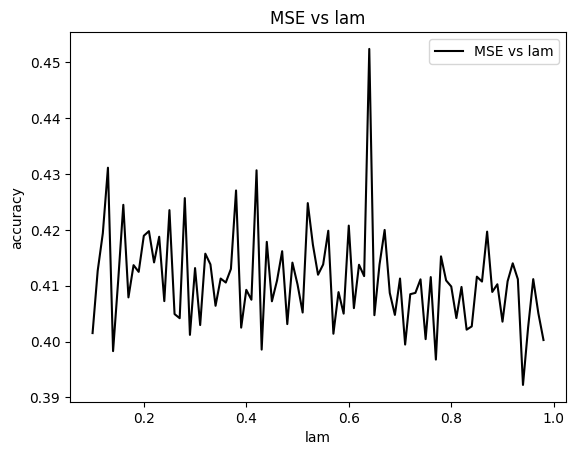

In [7]:
x_plot = np.arange(start = 0.1, stop = lam_val[lam_val.shape[0] -1] + 0.01, step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs lam')
plt.title('MSE vs lam')
plt.xlabel('lam')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [8]:
ret = techniques.train_ELM_L2_REG(xin = np.array(x), yin = np.array(y), p = p_n, control = True, lam = best_lam)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), random_state = 0, train_size = 0.8)

In [10]:
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, control = True, classification = False).reshape(-1,)

In [11]:
np.array(y_test).shape, y_pred.shape

((229,), (229,))

In [12]:
print(f"{np.array(y_test)}")

[5 4 6 6 5 6 5 6 6 7 5 6 6 5 6 6 6 6 5 5 6 5 7 6 5 5 5 6 6 5 6 5 5 6 5 6 6
 4 5 6 5 6 6 6 5 5 5 7 8 6 6 5 5 7 5 5 5 5 5 6 6 5 6 5 6 5 6 5 5 7 5 5 6 7
 6 7 6 7 5 7 5 5 6 5 6 6 6 5 5 7 6 7 4 5 6 6 5 5 5 5 3 5 8 5 6 6 6 6 5 5 5
 5 5 7 6 6 6 6 6 6 5 5 5 6 6 6 6 7 5 6 7 6 6 5 6 6 5 6 6 5 5 6 6 7 5 5 6 7
 6 5 5 6 6 6 5 5 5 6 5 6 5 6 5 5 5 5 7 7 7 6 5 4 5 7 6 6 6 5 5 6 5 5 5 5 5
 6 5 4 4 5 7 5 5 6 6 5 5 6 6 6 5 6 4 7 7 7 5 5 5 5 6 6 6 7 5 5 6 6 5 7 6 6
 6 5 5 6 7 5 5]


In [13]:
print(f"{y_pred}")

[5.15748093 4.93561557 4.81606106 5.47754937 5.35063783 5.72120773
 5.4227783  6.19531241 6.09962941 6.7354982  4.98166224 5.78953449
 5.3245219  5.29862922 6.24689901 4.61752242 5.7339455  5.29801801
 4.7752385  4.89864813 6.33069048 4.94352697 5.31826552 5.39300861
 5.17252805 5.22762969 5.24571862 6.19531241 5.67275956 5.49185349
 5.17361748 5.4487765  5.91765388 6.19292586 5.75633474 5.33148362
 5.67445917 5.24950195 5.11494046 5.7539842  5.36330539 6.28701564
 5.4886915  6.16211884 5.19612076 5.26817428 5.14927679 6.31204087
 6.65808815 5.90319306 5.4559812  5.84611464 5.32741309 6.6270133
 5.39441008 5.19172529 5.4852194  5.30588486 4.94405026 5.89888682
 5.61878446 4.9475316  5.73976679 5.34395497 5.39769755 5.19310352
 6.80205384 4.99129286 5.42397795 5.68331323 5.09393238 5.37264103
 5.45768938 6.0798251  6.07607048 6.50403846 6.18366702 6.21286174
 5.45530948 6.22551586 4.9475316  5.22381158 5.98372029 5.27989835
 6.25201533 5.52985135 5.36092699 4.94624971 5.30937771 5.86130